In [2]:
from src.net import FCOS
from src.encode import decode_fcos, visualize, visualize_feature_maps, encode_fcos
from PIL import Image
import numpy as np
from src.labelme import LabelMeDataset
import torch
import random
from matplotlib import pyplot as plt
from os import path, listdir, walk

In [3]:
image_size = (800, 999999999999)
class2str = ["dog", "cat"]
num_classes = len(class2str)

def transform(image, boxes, classes):
    return encode_fcos(image, boxes, classes, W=1024, H=1024, C=num_classes)


dataset = LabelMeDataset("index.txt", class2str, transform=transform)

In [3]:
image, rmaps, cmaps, clsmaps, tmaps = dataset[0]

In [4]:
def decode_image(image):
    image = (image* 255).round().astype('uint8')
    image = image.transpose(1, 2, 0)
    return Image.fromarray(image)

0.0 0.5371094


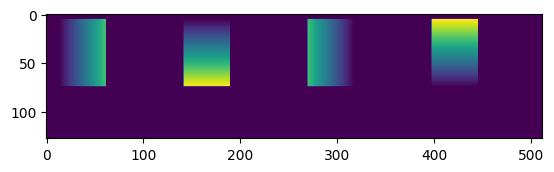

0.0 0.0


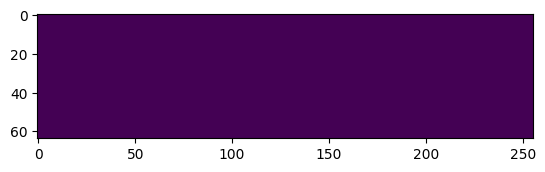

0.0 0.0


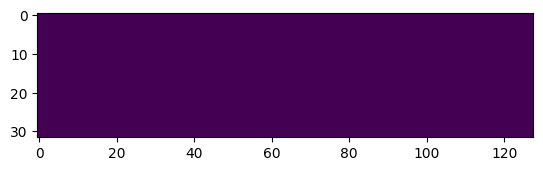

0.0 0.0


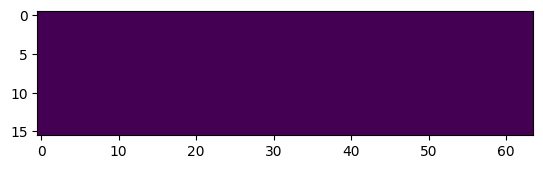

0.0 0.0


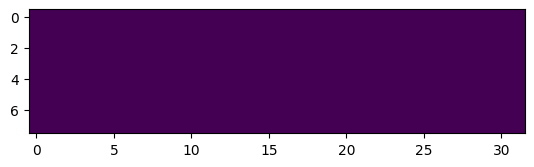

In [5]:
for rmap in rmaps:
    rmap = np.concatenate(list(rmap), -1)
    print(rmap.min(), rmap.max())
    plt.imshow(rmap)
    plt.show()

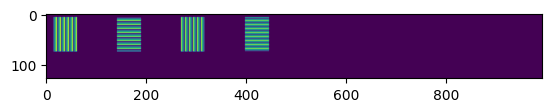

In [9]:
visualize_feature_maps(rmaps)

In [17]:
weights = torch.load("./model.old.pt", map_location="cpu")

In [18]:
weights.keys()

odict_keys(['backbone.stages.0.0.conv.weight', 'backbone.stages.0.0.conv.bias', 'backbone.stages.0.0.norm.weight', 'backbone.stages.0.0.norm.bias', 'backbone.stages.0.0.norm.running_mean', 'backbone.stages.0.0.norm.running_var', 'backbone.stages.0.0.norm.num_batches_tracked', 'backbone.stages.0.1.conv.weight', 'backbone.stages.0.1.conv.bias', 'backbone.stages.0.1.norm.weight', 'backbone.stages.0.1.norm.bias', 'backbone.stages.0.1.norm.running_mean', 'backbone.stages.0.1.norm.running_var', 'backbone.stages.0.1.norm.num_batches_tracked', 'backbone.stages.1.0.conv.weight', 'backbone.stages.1.0.conv.bias', 'backbone.stages.1.0.norm.weight', 'backbone.stages.1.0.norm.bias', 'backbone.stages.1.0.norm.running_mean', 'backbone.stages.1.0.norm.running_var', 'backbone.stages.1.0.norm.num_batches_tracked', 'backbone.stages.1.1.conv.weight', 'backbone.stages.1.1.conv.bias', 'backbone.stages.1.1.norm.weight', 'backbone.stages.1.1.norm.bias', 'backbone.stages.1.1.norm.running_mean', 'backbone.stages

In [20]:
for k, v in weights.items():
    if v.dtype == torch.long:
        continue
    m = torch.norm(v * 1.0)
    if m > 10:
        print(k, m)

fpn.fpn_projects.0.norm.weight tensor(11.2207)
fpn.fpn_projects.1.norm.weight tensor(11.2251)
fpn.fpn_projects.2.norm.weight tensor(11.3620)
fpn.fpn_extras.0.norm.weight tensor(11.2692)
fpn.fpn_extras.1.norm.weight tensor(11.2691)
heads.0.localize.0.norm.weight tensor(11.2690)
heads.0.localize.1.norm.weight tensor(11.2691)
heads.0.localize.2.norm.weight tensor(11.2692)
heads.0.localize.3.norm.weight tensor(11.2905)
heads.0.classification.0.norm.weight tensor(11.2689)
heads.0.classification.1.norm.weight tensor(11.2690)
heads.0.classification.2.norm.weight tensor(11.2690)
heads.0.classification.3.norm.weight tensor(11.2756)
heads.1.localize.0.norm.weight tensor(11.2690)
heads.1.localize.1.norm.weight tensor(11.2691)
heads.1.localize.2.norm.weight tensor(11.2691)
heads.1.localize.3.norm.weight tensor(11.2869)
heads.1.classification.0.norm.weight tensor(11.2689)
heads.1.classification.1.norm.weight tensor(11.2689)
heads.1.classification.2.norm.weight tensor(11.2690)
heads.1.classification